In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:
def indicadores(df):
    import ta

    # Calcular el RSI
    df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()

    # Calcular el Estocástico
    df['stoch'] = ta.momentum.StochasticOscillator(df['high'], df['low'], df['close'], window=14, smooth_window=3).stoch()

    williams_r_indicator = ta.momentum.WilliamsRIndicator(df['high'], df['low'], df['close'])
    df['williams_r'] = williams_r_indicator.williams_r()

    # Calcular el MFI
    df['mfi'] = ta.volume.MFIIndicator(df['high'], df['low'], df['close'], df['volume'], window=14).money_flow_index()

    # Calcular Aroon Up y Aroon Down
    aroon_indicator = ta.trend.AroonIndicator(df['high'], df['low'], window=14)
    df['aroon_up'], df['aroon_down'] = aroon_indicator.aroon_up(), aroon_indicator.aroon_down()

    # Calcular el CMF
    df['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(df['high'], df['low'], df['close'], df['volume'], window=20).chaikin_money_flow()


    # Calcular Stochastic RSI
    stoch_rsi_indicator = ta.momentum.rsi(df['close'], window=14)
    df['stoch_rsi'] = stoch_rsi_indicator

    # Calcular el CCI
    df['cci'] = ta.trend.CCIIndicator(df['high'], df['low'], df['close'], window=14).cci()

    return df

def backtest_trading_strategy(df_2, capital_inicial=1000):
    """
    Simula un backtest de una estrategia de trading utilizando señales de compra y venta.
    
    Parámetros:
    - df_2 (pd.DataFrame): DataFrame con las columnas necesarias ('date', 'preds', 'open').
    - capital_inicial (float): Capital inicial para comenzar las operaciones.
    
    Retorna:
    - capital_final (float): El capital final después de realizar todas las operaciones.
    - df_capital (pd.DataFrame): DataFrame con el historial de capital a lo largo del tiempo.
    """
    # Crear una copia del DataFrame
    df = df_2.copy()

    # Inicializar las variables
    capital = capital_inicial  # Capital actualizado durante las operaciones
    buy_price = 0  # Precio al que se compró el activo
    holding = False  # Estado de si se tiene una posición abierta

    # Listas para almacenar resultados
    capital_history = []  # Historial del capital a lo largo del tiempo
    buy_prices = []  # Historial de precios de compra
    sell_prices = []  # Historial de precios de venta

    # Iterar a través de las filas del DataFrame
    for index, row in df.iterrows():
        # Señal de compra
        if row['preds'] == 'b' and not holding:
            buy_price = row['open']
            holding = True  # Se abre la posición
            buy_prices.append(buy_price)
            #print(f"Compra a {buy_price} en {df['date'][index]}")
        
        # Señal de venta
        elif row['preds'] == 's' and holding:
            sell_price = row['open']
            roi = (sell_price - buy_price) / buy_price  # Cálculo del ROI
            capital += capital_inicial * roi  # Actualización del capital
            sell_prices.append(sell_price)
            holding = False  # Se cierra la posición
            #print(f"Venta a {sell_price} en {df['date'][index]} | ROI: {roi*100:.2f}%")
        
        capital_history.append(capital)  # Guardar capital actual

    # Imprimir el capital final
    print(f"Con un capital inicial de: {capital_inicial}, se obtendría un capital final de: {capital:.2f} USDT")

    # Crear un DataFrame para visualizar el historial de capital
    df

def plot_trading_signals(df_2):
    """
    Crea un gráfico de los precios de apertura con las señales de predicción de compra y venta.
    
    Parámetros:
    - df_2 (pd.DataFrame): DataFrame que debe contener las columnas 'open' y 'preds'.
    """
    # Crear gráfico de precios
    plt.figure(figsize=(14, 8))
    plt.plot(df_2['open'], label='Precio de Apertura', color='skyblue', alpha=0.7)

    # Añadir señales de predicción de compra y venta
    plt.scatter(df_2.index[df_2['preds'] == "b"], df_2['open'][df_2['preds'] == "b"], 
                marker='^', color='green', label='Predicción de Compra', alpha=1, s=100)
    plt.scatter(df_2.index[df_2['preds'] == "s"], df_2['open'][df_2['preds'] == "s"], 
                marker='v', color='red', label='Predicción de Venta', alpha=1, s=100)

    # Personalización del gráfico
    plt.title('Precio de Apertura con preds y Señales Reales de Compra y Venta', fontsize=16)
    plt.xlabel('Índice de Observación', fontsize=12)
    plt.ylabel('Precio de Apertura', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Mostrar gráfico
    plt.show()


In [3]:
os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/datos_master')
data = pd.read_csv('datos_sup_multiclase_3coins.csv')

# Cargar los datos
df = data.copy()
indicadores(df)

,date,open,high,low,close,volume,symbol,rsi,macd,adx,...,vwap,signal,stoch,williams_r,mfi,aroon_up,aroon_down,cmf,stoch_rsi,cci
0,07/08/2022,22951.20,23396.97,22850.00,23177.58,8.908469e+02,btc,NaN,601.214957,0.000000,...,22953.021170,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/08/2022,23177.58,24240.60,23159.87,23815.45,2.284476e+03,btc,NaN,626.217164,33.198505,...,23111.916570,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/08/2022,23815.45,23926.69,22875.00,23150.39,1.956631e+03,btc,NaN,585.616191,33.041706,...,23287.714030,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/08/2022,23150.39,24221.92,22664.06,23952.14,3.440139e+03,btc,NaN,611.089887,33.143794,...,23439.048480,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/08/2022,23952.14,24920.00,23857.13,23935.04,3.553310e+03,btc,NaN,622.719822,33.769644,...,23506.626690,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,25/03/2025,140.94,147.47,138.11,143.57,1.139415e+07,sol,52.163693,-5.534717,24.489674,...,131.066117,h,85.453189,-14.546811,58.998170,100.000000,0.000000,-0.071381,52.163693,214.915032
2915,26/03/2025,143.57,145.40,135.74,137.29,9.957127e+06,sol,48.228394,-4.868944,23.012487,...,132.271202,s,62.029094,-37.970906,49.655071,92.857143,7.142857,-0.064827,48.228394,121.347546
2916,27/03/2025,137.29,140.17,135.54,138.36,8.087444e+06,sol,48.935264,-4.206485,21.615582,...,133.301219,h,64.839830,-35.160170,49.827609,85.714286,0.000000,-0.019301,48.935264,79.561209
2917,28/03/2025,138.36,139.02,127.46,129.40,1.244398e+07,sol,43.570516,-4.354285,20.777717,...,133.363832,h,30.258587,-69.741413,40.816674,78.571429,28.571429,-0.049819,43.570516,-13.081058


In [4]:
# Definir las columnas predictoras y la variable objetivo
#features = ['rsi', 'adp', 'adm', 'dri', 'dlogri'] #no sirve

#features = ['rsi', 'stoch', 'williams_r', 'mfi', 'aroon_up', 'aroon_down', 'cmf', 'stoch_rsi', 'cci', 'macd', 'adx', 'adp', 'adm', 'dri', 'dlogri', 'avgtr', 'donch_hband', 'donch_lband', 'vwap'] #solo da ventas

#features = ['williams_r', 'cci', 'dri', 'dlogri'] # Me gustaron estas variables

#features = ['williams_r', 'cci', 'dri'] # Me gustaron estas variables da capital negativo en backtesting :/

# features = ['williams_r', 'cci', 'dri', 'rsi']

#features = ['cci', 'dri', 'rsi'] # ich mag das

features = ['cci', 'dri', 'cmf'] # ich mag das EL QUE MAS ME HA GUSTADO

#features = ['rsi', 'stoch', 'williams_r', 'mfi', 'aroon_up', 'aroon_down', 'cmf', 'stoch_rsi', 'cci'] # Este generó menos señales, como que lo pensó mas. Me gustó

#features = ['rsi', 'stoch', 'williams_r', 'mfi', 'aroon_up', 'aroon_down', 'cmf', 'cci', 'adx', 'adp', 'adm'] # Este solo generó señales de ventas

target = 'signal'

# Eliminar valores nulos
df = df.dropna()

# Separar variables predictoras y objetivo
X = df[features]
y = df[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir y entrenar el modelo MLP
clf = MLPClassifier(activation= 'relu', alpha= 0.01, hidden_layer_sizes= (50, 50), learning_rate_init= 0.001, max_iter= 1000, solver= 'sgd', random_state=22) #ese ha sido el mejor hasta ahorita
#clf = MLPClassifier(activation='relu', alpha=0.01, learning_rate_init=0.01, solver='sgd',hidden_layer_sizes=(50,), max_iter=1000, random_state=42) 
#clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1000,
              random_state=22, solver='sgd')

In [5]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'hidden_layer_sizes': [(50,), (100,), (50, 50), (25,25)],
#   'activation': ['relu', 'tanh'],
#    'solver': ['adam', 'sgd'],
#    'alpha': [0.0001, 0.001, 0.01, 0.1],
#    'learning_rate_init': [0.001, 0.01, 0.1],
#    'max_iter': [1000, 2000, 500]
#}
#grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#print(grid_search.best_params_)


In [6]:
# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8115
              precision    recall  f1-score   support

           b       0.73      0.26      0.38        93
           h       0.82      0.98      0.89       685
           s       0.67      0.13      0.22        92

    accuracy                           0.81       870
   macro avg       0.74      0.46      0.50       870
weighted avg       0.79      0.81      0.77       870



c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


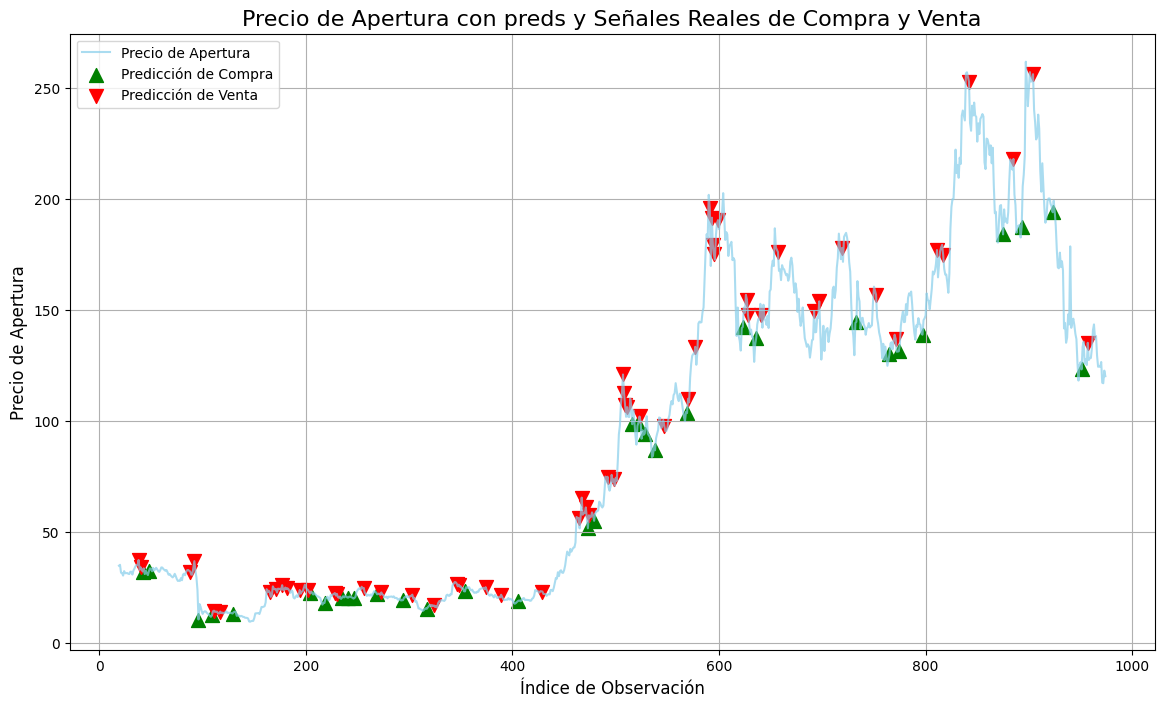

Con un capital inicial de: 1000, se obtendría un capital final de: 4400.25 USDT


In [7]:
# Ahora probemos con nuevos datos ajenos al modelo para ver como se desempeña

os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver5.0')
data_2 = pd.read_csv('datos_sol.csv')

# Cargar los datos
df_2 = data_2.copy()
indicadores(df_2)

# Realizar las predicciones sobre todos los datos nuevos
df_2 = df_2.dropna()
X_sol = df_2[features]
predicciones_validacion = clf.predict(X_sol)

# Agregar las predicciones como una nueva columna en el DataFrame
df_2['preds'] = predicciones_validacion

plot_trading_signals(df_2)
backtest_trading_strategy(df_2)

c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


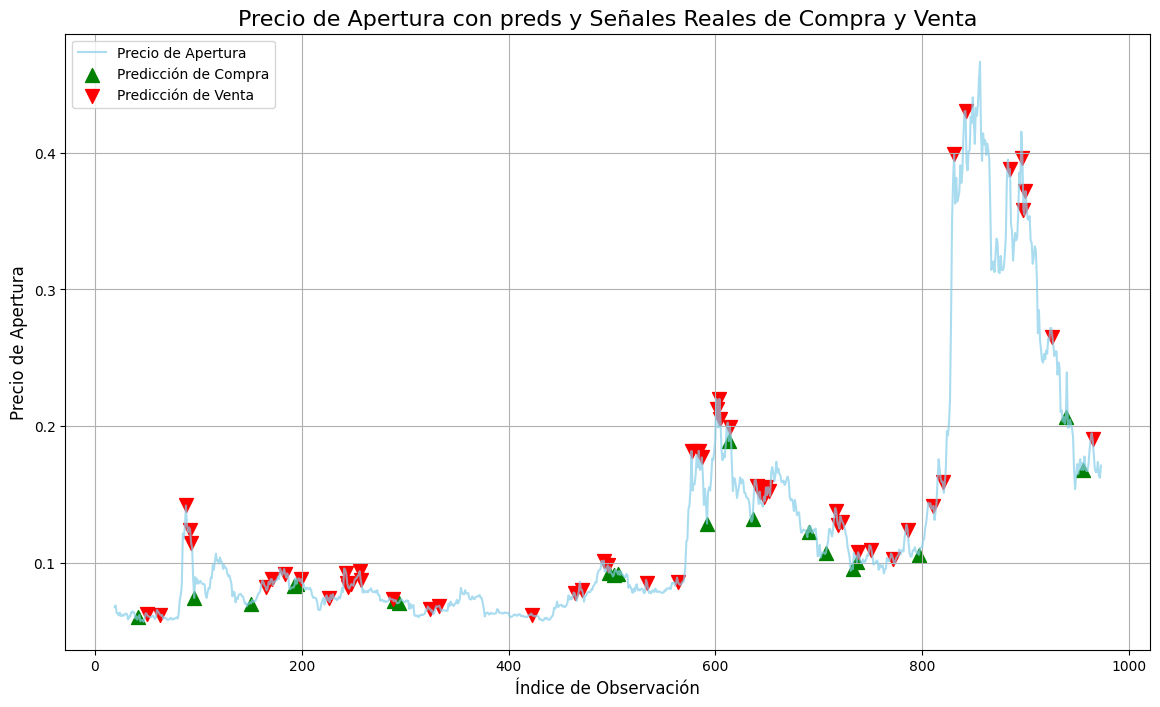

Con un capital inicial de: 1000, se obtendría un capital final de: 2462.19 USDT


In [8]:
# Ahora probemos con nuevos datos ajenos al modelo para ver como se desempeña

os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver5.0')
data_3 = pd.read_csv('datos_doge.csv')

# Cargar los datos
df_3 = data_3.copy()
indicadores(df_3)

# Realizar las predicciones sobre todos los datos nuevos
df_3 = df_3.dropna()
X_sol = df_3[features]
predicciones_validacion = clf.predict(X_sol)

# Agregar las predicciones como una nueva columna en el DataFrame
df_3['preds'] = predicciones_validacion

plot_trading_signals(df_3)
backtest_trading_strategy(df_3)

c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


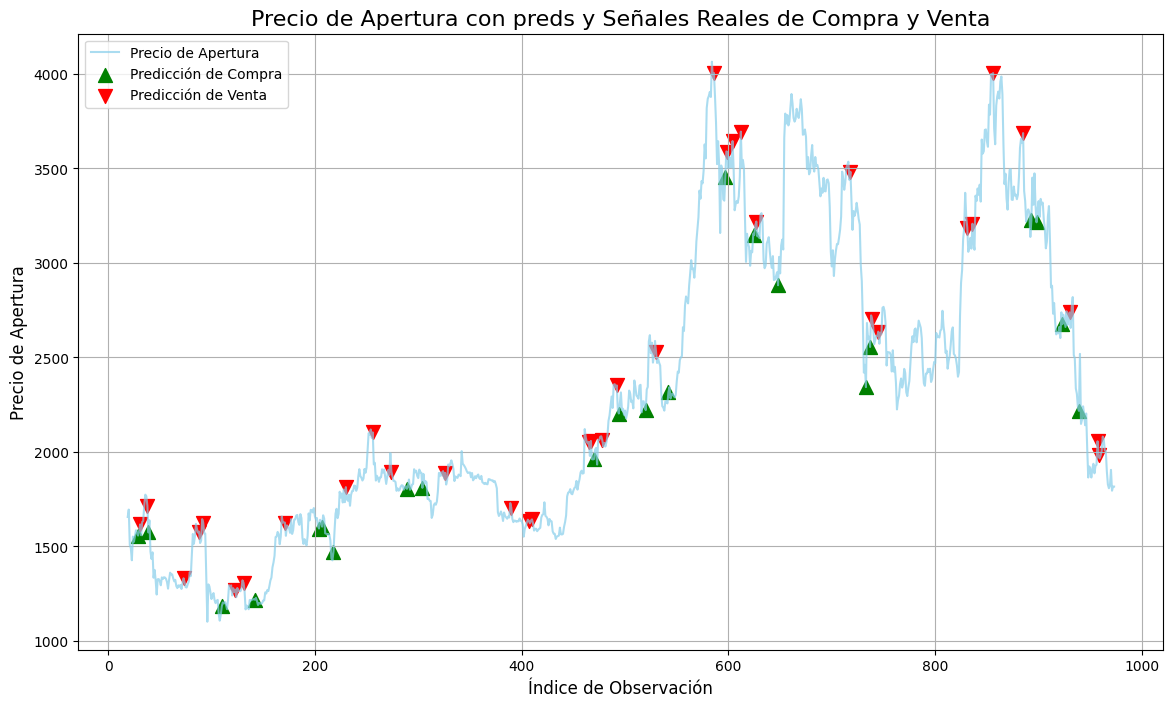

Con un capital inicial de: 1000, se obtendría un capital final de: 2602.50 USDT


In [9]:
# Ahora probemos con nuevos datos ajenos al modelo para ver como se desempeña

os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver5.0')
data_4 = pd.read_csv('datos_eth.csv')

# Cargar los datos
df_4 = data_4.copy()
indicadores(df_4)

# Realizar las predicciones sobre todos los datos nuevos
df_4 = df_4.dropna()
X_sol = df_4[features]
predicciones_validacion = clf.predict(X_sol)

# Agregar las predicciones como una nueva columna en el DataFrame
df_4['preds'] = predicciones_validacion

plot_trading_signals(df_4)
backtest_trading_strategy(df_4)